In [ ]:
# forked repo for ConvGRU
!git clone https://github.com/Niantangliu/ConvGRU.git
%cd ConvGRU

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()
tf.compat.v1.experimental.output_all_intermediates(True)
from tensorflow import keras
#from keras import Sequential
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization, ConvLSTM2D,SeparableConv2D,ConvSTAR2D,ConvGRU2D,Add,Subtract,AveragePooling3D, MaxPooling3D, Average
from keras.layers import Dropout, Input ,LeakyReLU
from keras.layers import concatenate,Concatenate
from keras.activations import relu
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
#from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from time import time


from keras.utils import plot_model

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv
from keras.utils import np_utils

from plotly.offline import init_notebook_mode
from keras.layers import Bidirectional
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd

In [ ]:
model = load_model('/content/gdrive/My Drive/Sentinel-1&2 patches/New train valida test/saved model2/3D-ConvSTAR.h5')

In [ ]:
layer_name = 'dense_3'
softmax_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

In [ ]:
val_indices_4 = np.argwhere(test_mask == 4).flatten()
patch_4 = test_X[val_indices_4]
output_feature4 = softmax_layer_model.predict(patch_4)
pd_predict_score4 = pd.DataFrame(output_feature4)

In [ ]:
# Output prediction score for each class
predicted_score_maize = pd_predict_score1[1]
predicted_score_soybean = pd_predict_score2[2]
predicted_score_wheat = pd_predict_score3[3]
predicted_score_othercrops = pd_predict_score4[4]

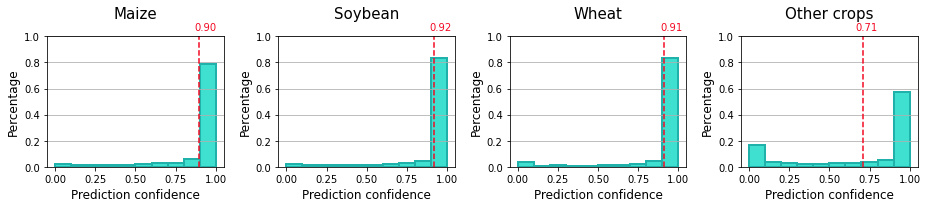

In [ ]:
# Plot prediction score
plt.figure(figsize=(13,3))

####################### maize
plt.subplot(1,4,1)
plt.hist(
            predicted_score_maize,
         weights=np.ones_like(predicted_score_maize)/predicted_score_maize.shape[0], bins=10,
            color="turquoise", edgecolor="lightseagreen", linewidth=2
        )

plt.xlabel("Prediction confidence", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title('Maize',fontsize = 15,pad=plt.rcParams["axes.titlepad"]*3)


avg = predicted_score_maize.mean()
plt.plot([avg, avg], [0, 1], color="#F20923", linestyle="--")
plt.annotate(
            "{:.2f}".format(avg), xy=(avg, 1.03), xycoords="axes fraction",
            va="bottom", ha="center", color="#F20923"
        )
ax = plt.gca()
ax.yaxis.grid(True)

############ soybean
plt.subplot(1,4,2)
plt.hist(
            predicted_score_soybean,
         weights=np.ones_like(predicted_score_soybean)/predicted_score_soybean.shape[0], bins=10,
            color="turquoise", edgecolor="lightseagreen", linewidth=2
        )

plt.xlabel("Prediction confidence", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title('Soybean',fontsize = 15,pad=plt.rcParams["axes.titlepad"]*3)


avg = predicted_score_soybean.mean()
plt.plot([avg, avg], [0, 1], color="#F20923", linestyle="--")
plt.annotate(
            "{:.2f}".format(avg), xy=(avg, 1.03), xycoords="axes fraction",
            va="bottom", ha="center", color="#F20923"
        )
ax = plt.gca()
ax.yaxis.grid(True)


######################## wheat
plt.subplot(1,4,3)
plt.hist(
            predicted_score_wheat,
         weights=np.ones_like(predicted_score_wheat)/predicted_score_wheat.shape[0], bins=10,
            color="turquoise", edgecolor="lightseagreen", linewidth=2
        )

plt.xlabel("Prediction confidence", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title('Wheat',fontsize = 15,pad=plt.rcParams["axes.titlepad"]*3)


avg = predicted_score_wheat.mean()
plt.plot([avg, avg], [0, 1], color="#F20923", linestyle="--")
plt.annotate(
            "{:.2f}".format(avg), xy=(avg, 1.03), xycoords="axes fraction",
            va="bottom", ha="center", color="#F20923"
        )
ax = plt.gca()
ax.yaxis.grid(True)


############# other crops
plt.subplot(1,4,4)
plt.hist(
            predicted_score_othercrops,
         weights=np.ones_like(predicted_score_othercrops)/predicted_score_othercrops.shape[0], bins=10,
            color="turquoise", edgecolor="lightseagreen", linewidth=2
        )

plt.xlabel("Prediction confidence", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title('Other crops',fontsize = 15,pad=plt.rcParams["axes.titlepad"]*3)

avg = predicted_score_othercrops.mean()
plt.plot([avg, avg], [0, 1], color="#F20923", linestyle="--")
plt.annotate(
            "{:.2f}".format(avg), xy=(avg, 1.03), xycoords="axes fraction",
            va="bottom", ha="center", color="#F20923"
        )
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('gdrive/My Drive/Sentinel-1&2 patches/Saved Model&plots/confidence map.png', bbox_inches = 'tight', dpi=600)
